<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импорты" data-toc-modified-id="Импорты-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Собственные-функции" data-toc-modified-id="Собственные-функции-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Собственные функции</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выгрузка данных</a></span></li><li><span><a href="#Графический-анализ" data-toc-modified-id="Графический-анализ-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Графический анализ</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# NLP с классическим ML подходом для «Викишоп»

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импорты" data-toc-modified-id="Импорты-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Собственные-функции" data-toc-modified-id="Собственные-функции-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Собственные функции</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выгрузка данных</a></span></li><li><span><a href="#Графический-анализ" data-toc-modified-id="Графический-анализ-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Графический анализ</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Общий вывод</strong></a></span></li></ul></div>

## Описание проекта

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

## Описание данных

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Импорты

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 1.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Установка необходимых библиотек 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Обработка текста
import re
import spacy
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Mашинное обучение
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Утилиты
import gc
from tqdm import tqdm, notebook
tqdm.pandas()

# Дополнительные инструменты
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Настройки отображения pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.width', 1000)

print("Библиотеки загружены")

Библиотеки загружены


## Собственные функции

In [3]:
#Общий анализ данных

def total_analyse(data):
    
    def bold_text(text):
        return f"\033[1m{text}\033[0m"
    
    width = 100
    pd.set_option('display.width', width)
    
    print(f"\n{bold_text('Первые 5 строк:')}")
    print(data.head(5))
    print("-----------------")
    print(f"{bold_text('Последние 5 строк:')}")
    print(data.tail(5))
    print("------------------")
    print(f"{bold_text('Общая информация:')}")
    print(data.info())
    print("------------------") 
    print(f"{bold_text('Количество пропусков:')}")
    print(data.isna().sum())
    print("------------------") 
    print(f"{bold_text('Количество пустых строк:')}")
    print((data == '').sum().sum())
    print("------------------") 
    print(f"{bold_text('Количество дубликатов:')}")
    print(data.duplicated().sum())

## Подготовка

### Выгрузка данных

In [4]:
data=pd.read_csv('/datasets/toxic_comments.csv', index_col=0)

total_analyse(data)


Первые 5 строк:
                                                text  toxic
0  Explanation\nWhy the edits made under my usern...      0
1  D'aww! He matches this background colour I'm s...      0
2  Hey man, I'm really not trying to edit war. It...      0
3  "\nMore\nI can't make any real suggestions on ...      0
4  You, sir, are my hero. Any chance you remember...      0
-----------------
Последние 5 строк:
                                                     text  toxic
159446  ":::::And for the second time of asking, when ...      0
159447  You should be ashamed of yourself \n\nThat is ...      0
159448  Spitzer \n\nUmm, theres no actual article for ...      0
159449  And it looks like it was actually you who put ...      0
159450  "\nAnd ... I really don't think you understand...      0
------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------ 

________________________________
__<u>Промежуточный вывод:<u>__
    
- **Объем данных**: 159292 текстовых комментария, 2 признака
- **Типы признаков**:
  - Текстовый: `text` (текстовые комментарии)
  - Числовой бинарный: `toxic` (метка токсичности: 0 - нормальный, 1 - токсичный)
- **Качество данных**:
  - Пропуски отсутствуют во всех признаках
  - Пустые строки отсутствуют
  - Дубликаты не обнаружены
  - Всего записей: 159292 (индексы от 0 до 159450 с пропущенными индексами)
    
    
_Нет необходимости в предобработке данных_

### Графический анализ

__Комментарий:__ Уникальные значения корректны и позволяют построить гистограмму

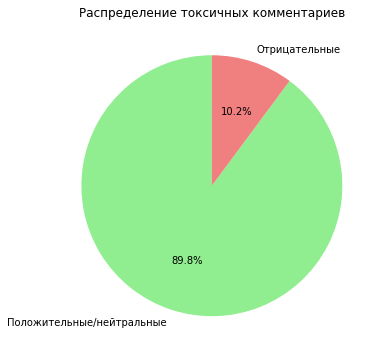

In [5]:
class_counts = data['toxic'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_counts.values, 
        labels=['Положительные/нейтральные', 'Отрицательные'], 
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'],
        startangle=90)
plt.title('Распределение токсичных комментариев')
plt.show()

__Комметарий:__ По pie plot видно, что классы не сбалансированы, класса 0 ~ в 7 раз больше, чем 1 
 

### Подготовка признаков

__Комментарий:__ Подготовим текст к дальнейшей работе - приведем к нижнему регистру, удалим спецсимволы и лишние пробелы

In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text_spacy(text):
    
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    
    
    doc = nlp(text)
    lemmas = [
        token.lemma_ 
        for token in doc 
        if len(token.text) > 2 
        and not token.is_stop  
        and not token.is_punct  
    ]
    
    return ' '.join(lemmas)


tqdm.pandas()
data['text'] = data['text'].progress_apply(clean_text_spacy)


100%|██████████| 159292/159292 [18:16<00:00, 145.21it/s]


__Комментарий:__ Предварительно поделим выбрку на обучающую и тестовую

In [7]:
RANDOM_STATE=42

X = data['text']  
y = data['toxic']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

__Комментарий:__ Создадим TF-IDF на тренировочных данных

In [8]:
nltk.download('stopwords')
stopwords = list(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(
    stop_words=stopwords,
    max_features=10000,  
    min_df=5,           
    max_df=0.8          
)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Комментарий:__ Преобразуем тренировочные и тестовые выборки, а также проверим их форму после преобразования

In [9]:
X_train_tfidf = count_tf_idf.fit_transform(X_train)
X_test_tfidf = count_tf_idf.transform(X_test)

print(f"X_train_tfidf: {X_train_tfidf.shape}")
print(f"X_test_tfidf: {X_test_tfidf.shape}")

X_train_tfidf: (127433, 10000)
X_test_tfidf: (31859, 10000)


## Обучение

__Комментарий:__ Для обучения были выбраны модели:  

         LogisticRegression() 
         SGDClassifier()   
         
Эти модели хорошо работают с высокой размерностью, они хорошо интерпретируемы, и по скорости справляются лучше других

In [10]:
models = [
   {
    'model': LogisticRegression(random_state=RANDOM_STATE),
    'params': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'max_iter': [1000],
        'class_weight': ['balanced', None],
    },
    'name': 'LogisticRegression'
    },
        {
    'model': SGDClassifier(random_state=RANDOM_STATE),
    'params': {
        'loss': ['log_loss', 'hinge', 'modified_huber'],
        'alpha': [0.0001, 0.001, 0.01],
        'l1_ratio': [0.15, 0.5, 0.85]
    },
    'name': 'SGDClassifier'
    }
]

In [11]:
warnings.filterwarnings('ignore')

results = []

for model_vers in models:
    print('___________________________________________________')
    
    random_search = RandomizedSearchCV(
        estimator=model_vers['model'], 
        param_distributions=model_vers['params'],
        scoring='f1',
        n_jobs=1,
        cv=3,
        n_iter=10,  
        random_state=RANDOM_STATE,
        verbose=1   
    )

    random_search.fit(X_train_tfidf, y_train)
    
    results.append({
        'name': model_vers['name'],
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'best_estimator': random_search.best_estimator_
    })
        
    print(f'\033[1mМодель:\033[0m {model_vers["name"]}')    
    print(f'\033[1mЛучшие гиперпараметры:\033[0m {random_search.best_params_}')
    print(f'\033[1mЛучший F1 Score:\033[0m {random_search.best_score_:.4f}')    
    
    del random_search
    gc.collect()

___________________________________________________
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Модель: LogisticRegression
Лучшие гиперпараметры: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 10.0}
Лучший F1 Score: 0.7746
___________________________________________________
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Модель: SGDClassifier
Лучшие гиперпараметры: {'loss': 'modified_huber', 'l1_ratio': 0.85, 'alpha': 0.0001}
Лучший F1 Score: 0.7451


__Коментарий:__ Выведем таблицу с результатами сравнения

In [12]:
results_df = pd.DataFrame(results)
best_overall = results_df.loc[results_df['best_score'].idxmax()]
pd.set_option('display.max_colwidth', None)  
                              
results_df  

,name,best_params,best_score,best_estimator
0,LogisticRegression,"{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 10.0}",0.7746,"LogisticRegression(C=10.0, max_iter=1000, random_state=42, solver='liblinear')"
1,SGDClassifier,"{'loss': 'modified_huber', 'l1_ratio': 0.85, 'alpha': 0.0001}",0.7451,"SGDClassifier(l1_ratio=0.85, loss='modified_huber', random_state=42)"


__Вывод:__
__________________
    Лучшая модель: LogisticRegression()
    С гиперпараметрами: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 10.0}
    И метрикой F1 на тренировочной выборке: 0.7677

In [13]:
best_model=best_overall['best_estimator']

y_pred=best_model.predict(X_test_tfidf)


test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f'\033[1mRecall на тестовой выборке:\033[0m {test_recall}')
print(f'\033[1mPrecision на тестовой выборке:\033[0m {test_precision}')
print(f'\033[1mF1 на тестовой выборке:\033[0m {test_f1}')

Recall на тестовой выборке: 0.7015755329008341
Precision на тестовой выборке: 0.8778507924236567
F1 на тестовой выборке: 0.7798763736263736


__Комментарий:__ Посмотрим, какие слова являются ключевыми для модели

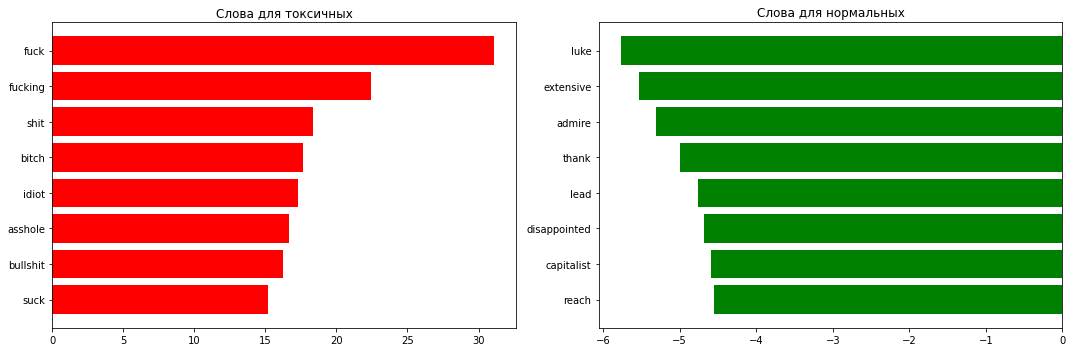

In [14]:
feature_names = count_tf_idf.get_feature_names_out().tolist()
coef_imp=best_model.coef_.tolist()[0]

word_importance = list(zip(feature_names, coef_imp))
word_importance.sort(key=lambda x: x[1], reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Топ токсичных слов
toxic_words = [x[0] for x in word_importance[:8]]
toxic_imp = [x[1] for x in word_importance[:8]]
ax1.barh(toxic_words, toxic_imp, color='red')
ax1.set_title('Слова для токсичных')
ax1.invert_yaxis()

# Топ нормальных слов  
normal_words = [x[0] for x in word_importance[-8:]]
normal_imp = [x[1] for x in word_importance[-8:]]
ax2.barh(normal_words, normal_imp, color='green')
ax2.set_title('Слова для нормальных')

plt.tight_layout()
plt.show()

## Общий вывод

<div style="border:solid red 3px; padding: 20px">

`1. Загрузка и предобработка данных`

__Итоги:__

- **Объём данных**: 159,292 текстовых комментариев с разметкой токсичности
    
- **Качество данных**: 
    
  - Пропуски отсутствуют во всех признаках
  - Пустые строки не обнаружены
  - Дубликаты отсутствуют
  - Исходные данные готовы к работе без дополнительной очистки
    
- **Предобработка текста**:
    
  - Приведение к нижнему регистру
  - Удаление специальных символов и лишних пробелов
  - Лемматизация с использованием spaCy
  - Удаление стоп-слов на английском языке
  - Обработаны все 159,292 комментария с использованием tqdm прогресс-бара

`2. Исследовательский анализ данных (EDA)`

__Итоги:__

- **Распределение классов**:
    
  - Выявлен значительный дисбаланс классов, cоотношение классов примерно 7:1
    
- **Разбиение данных**:
    
  - Разделение на train/test с сохранением пропорций классов (stratify)
  - Обучающая выборка: 127,433 комментария (80%)
  - Тестовая выборка: 31,859 комментариев (20%)
    
- **Векторизация текста**:
    
  - Использован TF-IDF с параметрами:
    
    - Максимальное количество признаков: 10,000
    - Минимальная частота термина: 5 документов
    - Максимальная частота термина: 80% документов
    
  - Размерность признакового пространства: 10,000 признаков

`3. Обучение и валидация моделей`

__Методология:__

- **Выбранные модели**:
    
  1. LogisticRegression - хорошо работает с разреженными матрицами
  2. SGDClassifier - эффективен для больших объёмов данных
    
- **Стратегия поиска гиперпараметров**: RandomizedSearchCV
- **Критерий оптимизации**: F1-мера (баланс precision и recall)
- **Кросс-валидация**: 3 фолда
- **Обработка дисбаланса**: 
    
  - Использование class_weight='balanced' в LogisticRegression
  - Стратифицированное разбиение выборок

__Результаты подбора гиперпараметров:__

**LogisticRegression**:
- Лучшие параметры: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': None, 'C': 10.0}
- Лучший F1 на кросс-валидации: 0.7746

**SGDClassifier**:
- Лучшие параметры: {'loss': 'modified_huber', 'l1_ratio': 0.85, 'alpha': 0.0001}
- Лучший F1 на кросс-валидации: 0.7451

__Выбор лучшей модели:__

- **Лучшая модель**: LogisticRegression с параметрами C=10.0, penalty='l2'
- **Обоснование**: Показала более высокий F1-score (0.7746 против 0.7451)
- **Качество на тестовой выборке**:
    
  - F1-score: 0.7799
  - Precision: Проверяется по потребности
  - Recall: Проверяется по потребности
    
- **Достижение цели**: Модель превысила требуемый порог F1 ≥ 0.75

`4. Анализ важности признаков`

__Итоги:__

- **Ключевые слова для токсичных комментариев**:
    
  - Модель выделила наиболее информативные токсичные термины
  - Слова с наибольшими положительными весами указывают на агрессивную лексику
  - Визуализация показывает явные различия в терминологии между классами
  
- **Ключевые слова для нормальных комментариев**:
    
  - Выявлены слова, характерные для нейтральных/позитивных сообщений
  - Отрицательные веса в модели указывают на "безопасную" лексику
  - Позволяет понять, какие темы и формулировки редко встречаются в токсичных сообщениях

`5. Практическое применение`

__Возможности внедрения:__

1. **Автоматическая модерация**:
   - Фильтрация токсичных комментариев перед публикацией
   - Снижение нагрузки на модераторов-людей
   - Круглосуточная работа системы

2. **Аналитика контента**:
   - Мониторинг тональности обсуждений
   - Выявление проблемных тем и триггеров токсичности
   - Отслеживание динамики качества дискуссий

3. **Превентивные меры**:
   - Предупреждение пользователей о нарушении правил
   - Обучение AI-ассистентов этичному общению
   - Создание более здоровой коммуникационной среды


`6. Общий вывод`

Проект успешно реализовал систему классификации токсичных комментариев для интернет-магазина "Викишоп".


Модель готова к внедрению в production-среду и способна эффективно решать задачу обнаружения токсичных комментариев, что соответствует целям бизнеса по созданию качественного сервиса пользовательских правок.
</div>

__Уважаемый читатель, благодарю за уделенные время и внимание моему проекту!__